In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))
matplotlib.style.use('ggplot')

In [2]:
%matplotlib inline

### Importing the Training Set

In [3]:
file= r'train_ZoGVYWq.csv'
df= pd.read_csv(file)
df.shape

(79853, 13)

In [4]:
df.head(10)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1
5,59951,0.540,17527,282080,2.0,0.0,0.0,99.18,9,B,Rural,22200,1
6,54031,1.000,24829,118400,0.0,0.0,0.0,99.05,11,B,Urban,7500,1
7,94290,1.000,21911,180240,1.0,6.0,4.0,99.33,3,A,Urban,9600,0
8,93730,0.621,9868,92520,0.0,0.0,0.0,99.58,4,A,Urban,7500,1
9,84844,0.908,23008,107180,2.0,0.0,0.0,98.91,11,A,Rural,5400,0


### This shows the predictors with some null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
id                                  79853 non-null int64
perc_premium_paid_by_cash_credit    79853 non-null float64
age_in_days                         79853 non-null int64
Income                              79853 non-null int64
Count_3-6_months_late               79756 non-null float64
Count_6-12_months_late              79756 non-null float64
Count_more_than_12_months_late      79756 non-null float64
application_underwriting_score      76879 non-null float64
no_of_premiums_paid                 79853 non-null int64
sourcing_channel                    79853 non-null object
residence_area_type                 79853 non-null object
premium                             79853 non-null int64
renewal                             79853 non-null int64
dtypes: float64(5), int64(6), object(2)
memory usage: 7.9+ MB


In [6]:
df.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
premium                                0
renewal                                0
dtype: int64

### Descriptive statistics and exploratory data analysis (EDA)

Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

In [7]:
df.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,10924.507533,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,9401.676542,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,1200.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,5400.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,7500.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,13800.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,60000.000000,1.000000


From the descriptive statistics above, one can tell the following:

1. the skewedness of each features by comparing the mean to the median (50% mark). Most of the variables, especially the dummy variables seem right skewed, but nothing really serious since variance is not overly high
2. skewedness from #1 if any, translate to some outliers in the distribution. This sometimes can affect results of the analysis, and may need further investigation.
3. the distribution of the datapoints. The greater the standard deviation ('std'), the more dispersed the datapoints are.

Note that the descriptive statistics above excludes the missing values and categorical variables. From the above we see that most of the variables are either slightly right or left skewed. This can also be seen in the plot of the histogram below.


** Initial EDA on all variables **

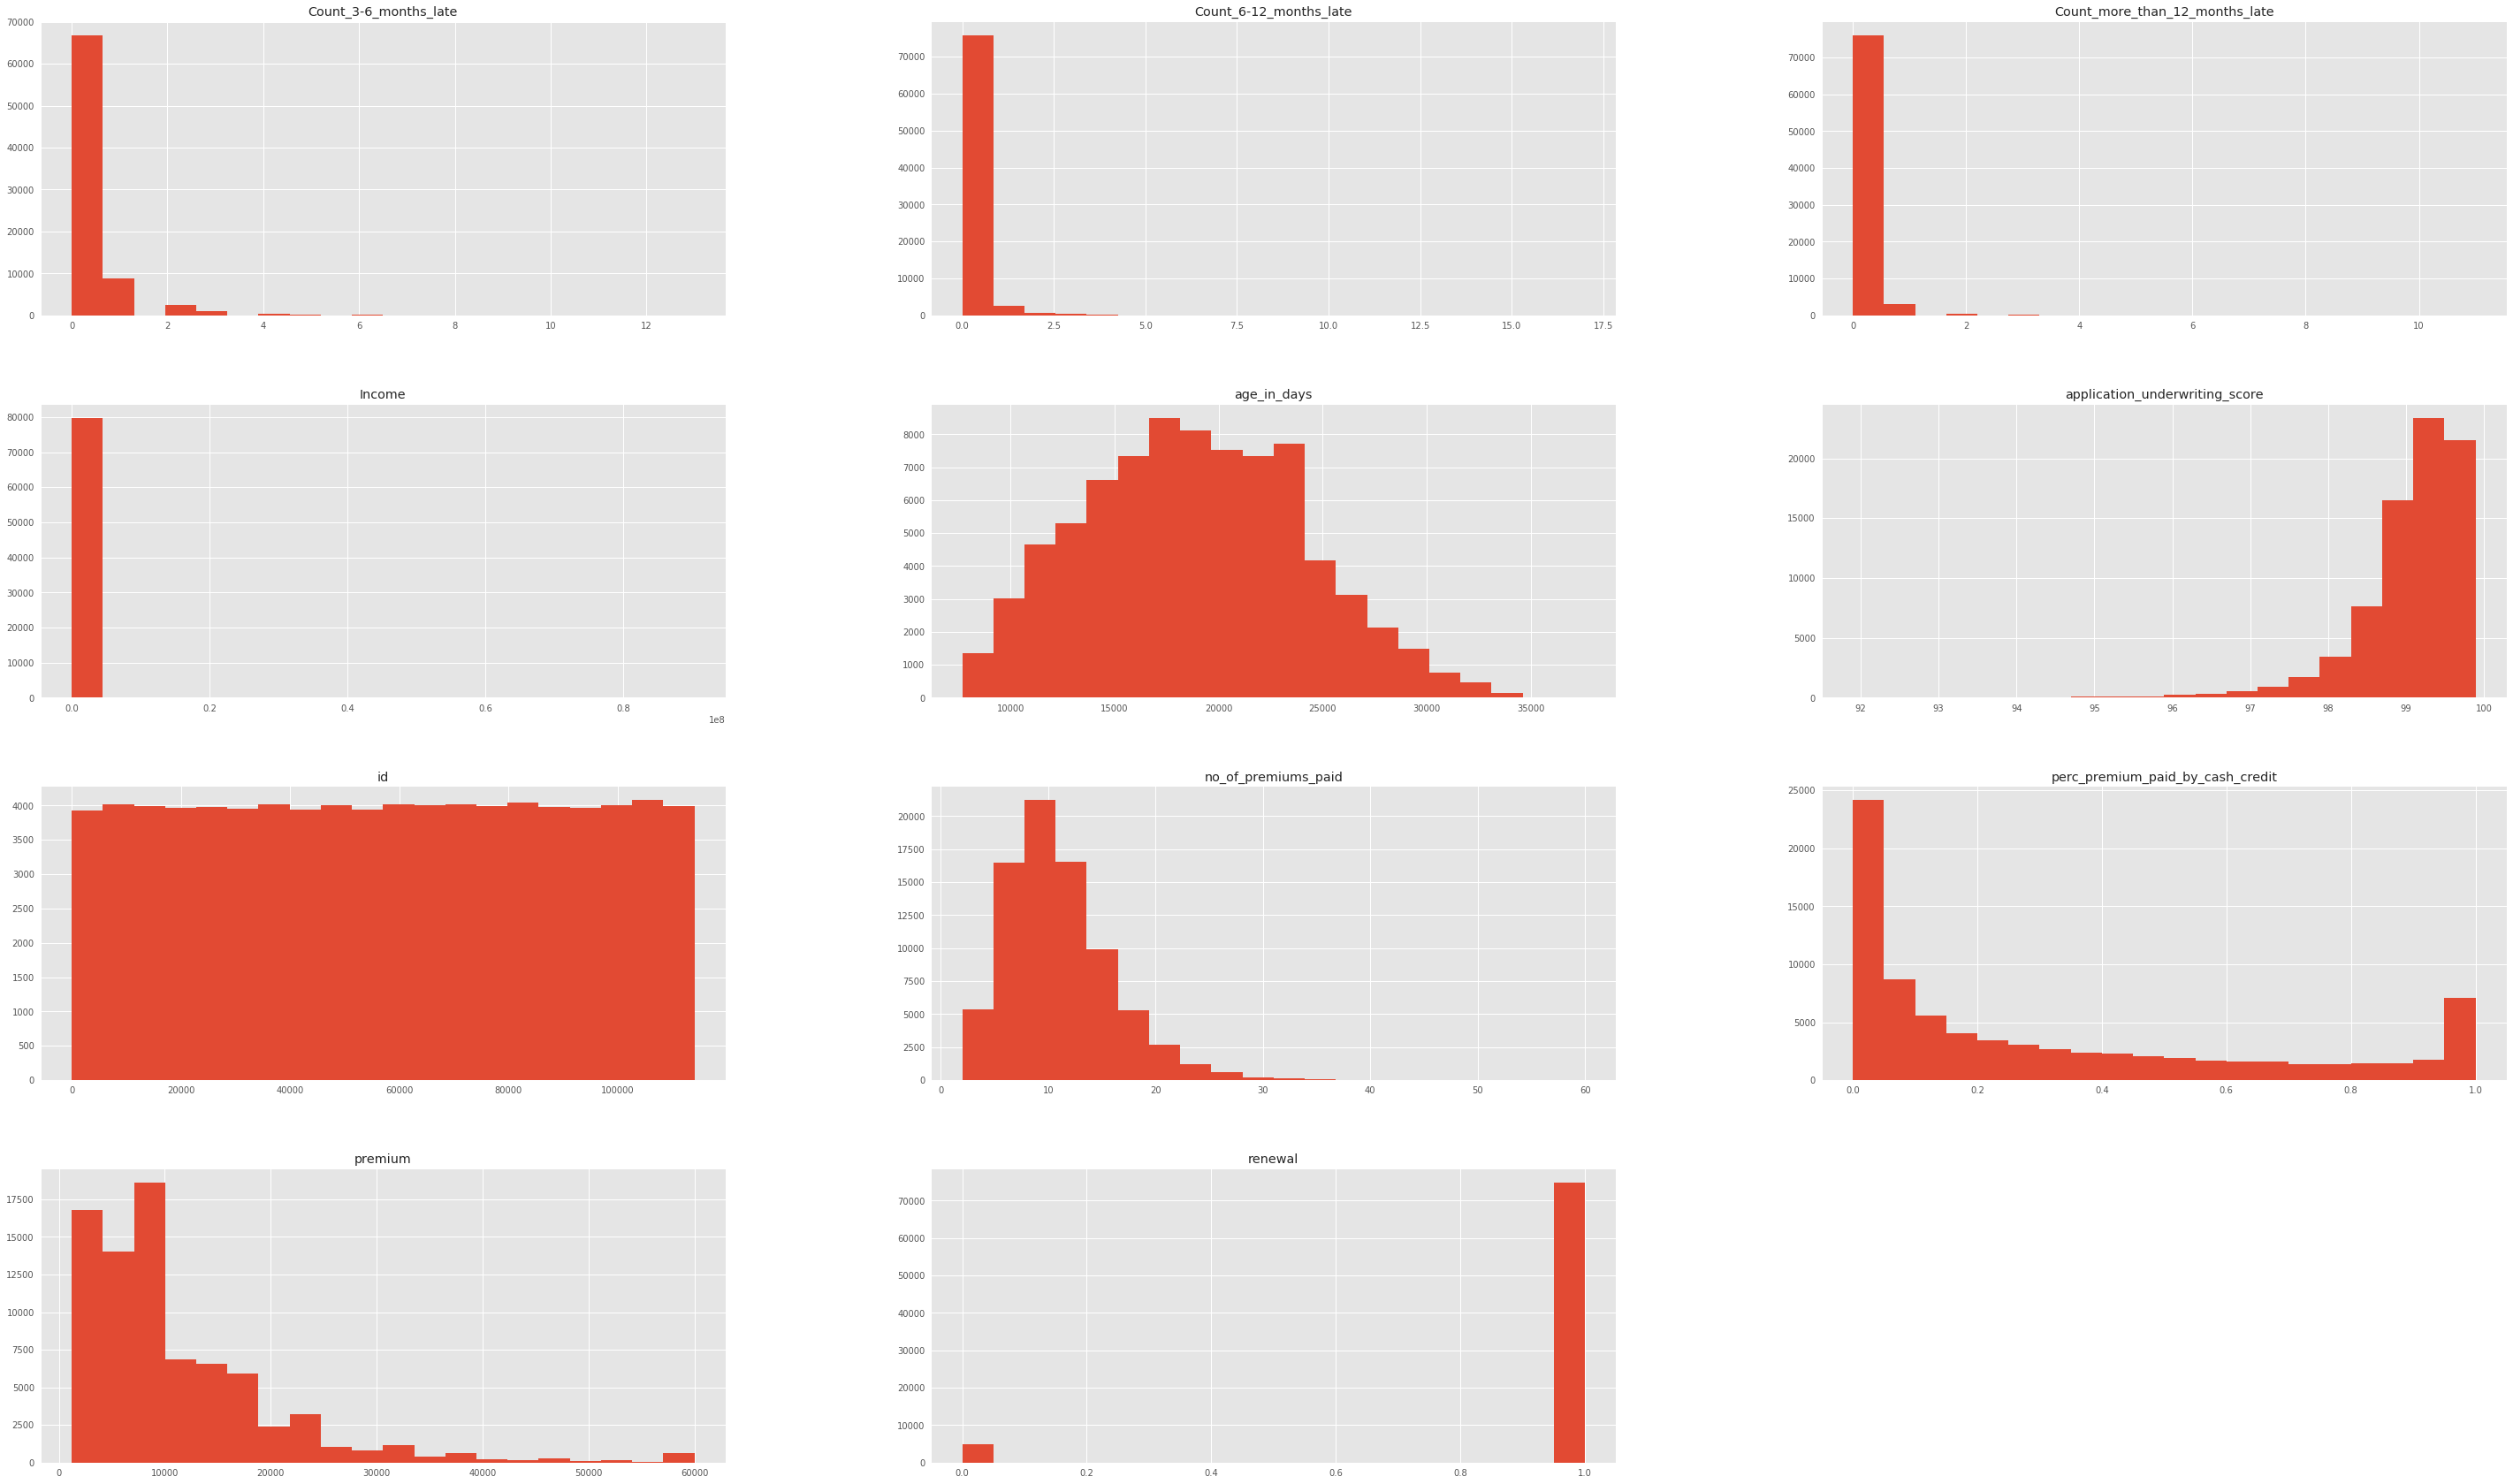

In [8]:
df.hist(bins=20, figsize=(50,30))
plt.show()

** Checking for outliers **

In [9]:
df.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal'],
      dtype='object')

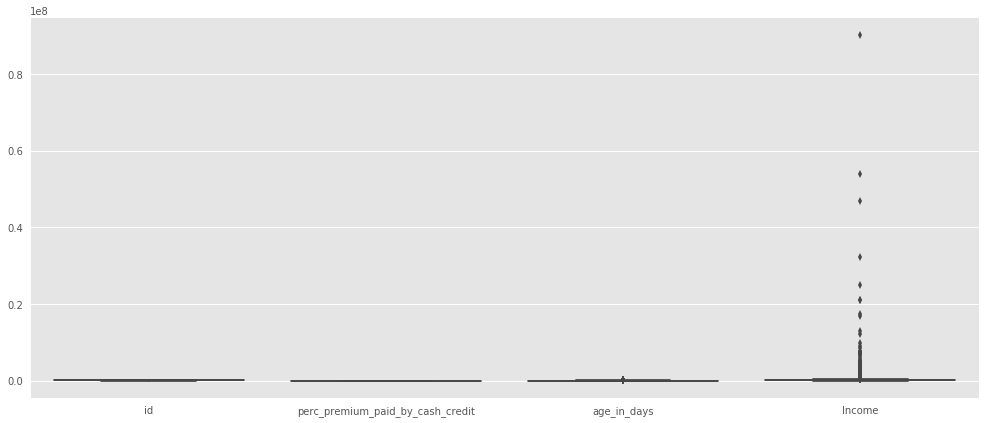

In [10]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df[['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',]])
plt.show()

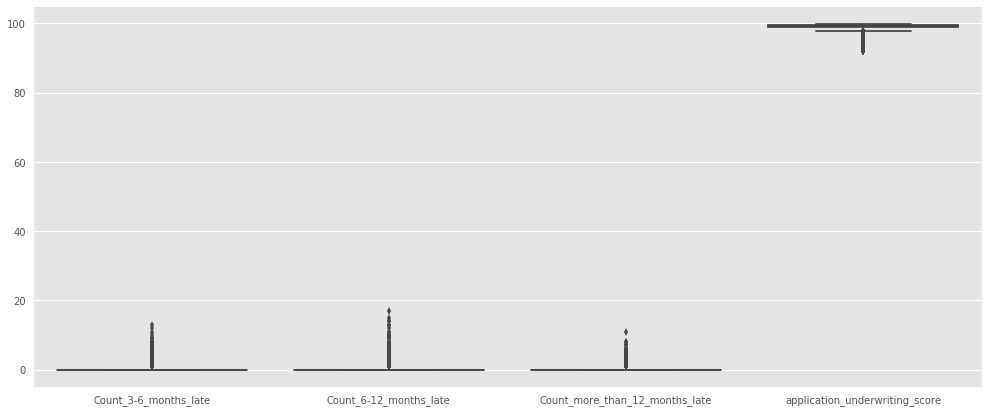

In [11]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df[['Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',]])
plt.show()

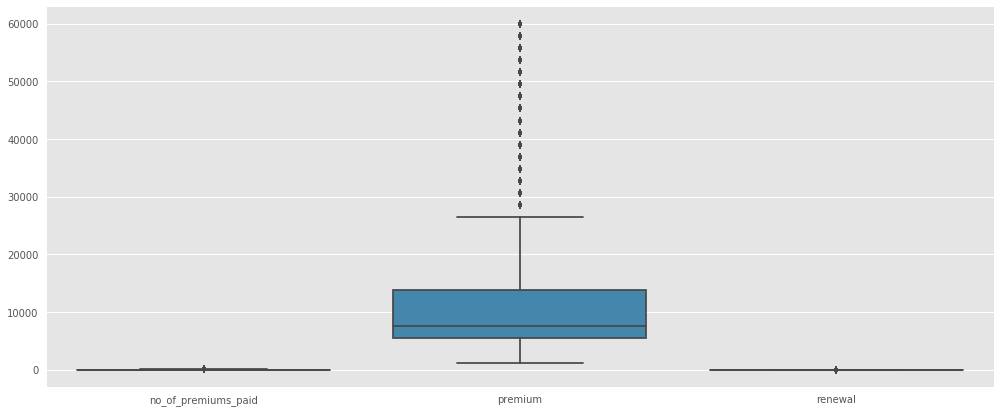

In [12]:
fig = plt.figure(figsize=(17, 7))
fig.add_subplot(1,1,1)
sns.boxplot(data= df[[ 'no_of_premiums_paid', 'premium', 'renewal']])
plt.show()

**Staistical Inference**

Computing the correlation matrix of all variables.

In [13]:
corr_matrix = df.corr()
corr_matrix

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,0.003430,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.067523,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.074070,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.302825,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.001086,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.043794,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.023615,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.135078,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.191889,0.022664
premium,0.003430,-0.067523,0.074070,0.302825,-0.001086,-0.043794,-0.023615,0.135078,0.191889,1.000000,0.036416


In [14]:
df.copy().columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'renewal'],
      dtype='object')

In [15]:
#checking correlation of all features with the target variable - 'renewal'
corr_matrix['renewal'].sort_values(ascending=True)

Count_6-12_months_late             -0.286159
Count_3-6_months_late              -0.248900
perc_premium_paid_by_cash_credit   -0.240980
Count_more_than_12_months_late     -0.240385
id                                 -0.005064
Income                              0.016541
no_of_premiums_paid                 0.022664
premium                             0.036416
application_underwriting_score      0.068715
age_in_days                         0.095103
renewal                             1.000000
Name: renewal, dtype: float64

From here we see that four variables have some negative association with the renewal of the policy, such that there is higher likelihood for the policy to be renewed if the values of these variables somewhat reduces. All others predictors have very weak positive association to the policy being renewed. Although, correlation does not mean casusation without a thoughtout experiement, if i were an agent of the insurance company, i will pay more attention to this four aforementioned variables to see how that pans out. 

***Statistical analysis to establish statistical significance of some features on renewal of the policy***

From the correlation matrix above, we see that 'Count_6-12_months_late', 'Count_3-6_months_late', 'perc_premium_paid_by_cash_credit' and 'Count_more_than_12_months_late' all have some form of association with the renewal of the policy, while others have a weak positive association. Now, we what to know if this association is just by chance or if trully it really exist. To do that, We start off with a hypothesis test using a linear regression model and checking the p-values of each variable in the mix at a statistical significance of 0.05.

The Two-Sample T-Test should be appropriate for this, because we are comparing assumed independent measures on observational units where the standard deviation is either unkown or not given.

Central Limit Theorem (CLT) also applies because the t-statistics follow a distribution which is the t-distribution. This distribution arises from a plot of each and every t-statistics of every sample randomly selected from the measured population measured. Population measured being each variable of the observational units. And, this distribution is assumed to be normal following a bell curve with the t-statics values in the horizontal and the probability density function (PDF) on the vertical. The more random samples one select from the population, the more the curve tend to a finer and perfect normal distribution. This exemplify the CLT in that even if a population that random samples are drawn from is not normal, the sample mean distribution itself, which is the plot of the sample mean from randomly selected samples from the population tends to a normal distribution.

To be able to do that, we first need to impute missing values in the data set and then hot code categorical variables because the linear model we are using cannot take string values

In [16]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        Columns of dtype object are imputed with the most frequent value 
        in column.
        Columns of other types are imputed with median of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
            index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [17]:
df_stat = DataFrameImputer().fit_transform(df.copy())
df_stat.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [18]:
#shows if all nulls are filled in
df_stat.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
renewal                             0
dtype: int64

***Hot coding categorical variables***

In [19]:
var_mod = ['sourcing_channel','residence_area_type']

#create the dummy variables for each category of the three features 
df_dum = pd.get_dummies(df_stat[var_mod])

#drop original features once dummy variables have been created
df_no_cat = df_stat.drop(['sourcing_channel','residence_area_type'], axis=1)

In [20]:
df_dum.shape

(79853, 7)

In [21]:
#merge the created dummy variables with the original dataframe and reset the index for the overall dataframe
df_stat2 = pd.concat([df_no_cat, df_dum], axis=1).reset_index(drop=True)
df_stat2.shape

(79853, 18)

In [22]:
df_stat2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,renewal,sourcing_channel_A,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Rural,residence_area_type_Urban
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,3300,1,0,0,1,0,0,0,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,18000,1,1,0,0,0,0,0,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,3300,0,0,0,1,0,0,1,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,9600,1,1,0,0,0,0,0,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,9600,1,0,1,0,0,0,0,1


***Running the significance test***

The null and alternate hypotheses

Ho: the population mean of americans perpetrating terrorist attacks is same as foreigners between 1940 and 2016

Ha: the population mean of americans perpetrating terrorist attacks is significantly different from that of foreigners between 1940 and 2016

In [23]:
import statsmodels.formula.api as sm

In [24]:
df_stat2.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'renewal', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Rural',
       'residence_area_type_Urban'],
      dtype='object')

In [25]:
X = df_stat2[['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'premium', 'sourcing_channel_A',
       'sourcing_channel_B', 'sourcing_channel_C', 'sourcing_channel_D',
       'sourcing_channel_E', 'residence_area_type_Rural',
       'residence_area_type_Urban', ]] 
y = df_stat2['renewal']

In [26]:
result = sm.OLS(y.astype(float), X.astype(float)).fit()

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                renewal   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     982.4
Date:                Sun, 22 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:43:22   Log-Likelihood:                 6679.6
No. Observations:               79853   AIC:                        -1.333e+04
Df Residuals:                   79837   BIC:                        -1.318e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
id                               -4.871e-08   2.39e-08     -2.036      0.042   -9.56e-08   -1.83e-09
perc_premium_paid_by_cash_credit    -0.1008      0.003    -39.030      0.000      -0.106      -0.096
age_in_days                       1.281e-06   1.63e-07      7.867      0.000    9.62e-07     1.6e-06
Income                            9.776e-10   1.67e-09      0.587      0.557   -2.29e-09    4.24e-09
Count_3-6_months_late               -0.0480      0.001    -39.021      0.000      -0.050      -0.046
Count_6-12_months_late              -0.1068      0.002    -55.555      0.000      -0.111      -0.103
Count_more_than_12_months_late      -0.0936      0.003    -34.436      0.000      -0.099      -0.088
application_underwriting_score       0.0093      0.001      7.943      0.000       0.007       0.012
no_of_premiums_paid                 -0.0004      0.000     -2.286      0.022      -0.001   -5.52e-05
premium                           3.049e-07   9.18e-08      3.322      0.001    1.25e-07    4.85e-07
sourcing_channel_A                   0.0166      0.033      0.498      0.618      -0.049       0.082
sourcing_channel_B                   0.0175      0.033      0.525      0.600      -0.048       0.083
sourcing_channel_C                   0.0145      0.033      0.436      0.663      -0.051       0.080
sourcing_channel_D                   0.0097      0.033      0.291      0.771      -0.056       0.075
sourcing_channel_E                   0.0134      0.034      0.393      0.695      -0.054       0.080
residence_area_type_Rural            0.0357      0.083      0.429      0.668      -0.128       0.199
residence_area_type_Urban            0.0361      0.083      0.434      0.664      -0.127       0.199
==============================================================================
Omnibus:                    49968.744   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476790.243
Skew:                          -2.989   Prob(JB):                         0.00
Kurtosis:                      13.371   Cond. No.                     5.95e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.57e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the above we see the the following 6 predictors ('perc_premium_paid_by_cash_credit', 'age_in_days', 'Count_3-6_months_late', 'Count_6-12_months_late','Count_more_than_12_months_late', 'application_underwriting_score') have p-value of 0.000, which is much less than the significance level of 0.05 and have the strongest significance. 'Income' also has p-value of 0.001, and 'no_of_premiums_paid' has a p-value of 0.022, which are also significant. This means these predictors ability to predict renewal of policy are not occurring just by chance. Their effect actually exist in this analysis. The variable 'id' though significant should be irrelevant because it's an assigned value and cannot be considered a measured random value or variable on each policy so should be excluded.  Every other variables in the mix are insignificant in this analysis.

That said, we have to reject the null hypotheis that this variables have no effect on predicting the renewal of the policy and say that they in fact have a significant effect in explaining renewal of policy by the insured.

It is also good to say that most likely than not, the insurance agent will be spending his or her effort on the significant predictors to try to get the insured clients to renew their policies. The extent or weight of the effort in hours on each predictor will be proportional to strength of the significance and importance of each features in the mix.

** Analyzing the Categorical Variables **

In [28]:
df['sourcing_channel'].value_counts()

A    43134
B    16512
C    12039
D     7559
E      609
Name: sourcing_channel, dtype: int64

In [29]:
df['residence_area_type'].value_counts()

Urban    48183
Rural    31670
Name: residence_area_type, dtype: int64

### Creating a mini-Test Set to test the algorithm

In [30]:
#here we are saying that we want the test data to be 20% of the full dataset, and the random_state is just setting a 
#random number generator's seed before creating the test set so that it always generates the same shuffled indices.
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [31]:
train_set.shape, test_set.shape

((71867, 13), (7986, 13))

In [32]:
#we create a copy of the train data we will work with
df_train_copy = train_set.copy()
df_test_copy = test_set.copy()

**Creating a balanced training set***

In [33]:
train_set['renewal'].value_counts()

1    67409
0     4458
Name: renewal, dtype: int64

In [34]:
# Separate majority and minority classes
df_majority = train_set[train_set['renewal']==1]
df_minority = train_set[train_set['renewal']==0]
 
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=67409,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])


In [35]:
df_upsampled['renewal'].value_counts()

1    67409
0    67409
Name: renewal, dtype: int64

** Separating predictors from target for the training test for the classification analysis **

In [36]:
#creating predictors and target variables for the train set
X_train = df_upsampled.drop(['renewal', 'id'], axis=1)
y_train = df_upsampled['renewal']

X_test = df_test_copy.drop(['renewal', 'id'], axis=1)
y_test = df_test_copy['renewal']

In [37]:
X_train.shape, y_train.shape

((134818, 11), (134818,))

In [38]:
X_test.shape, y_test.shape

((7986, 11), (7986,))

In [39]:
### Importing the provided Test Set
file2= r'test_66516Ee.csv'
df2= pd.read_csv(file2)
df2.head(7)

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600
5,64797,0.112,16065,245130,0.0,0.0,0.0,98.88,7,B,Rural,11700
6,67412,0.325,17167,388050,6.0,0.0,0.0,99.00,27,C,Urban,3300


In [40]:
df2.shape

(34224, 12)

In [41]:
#note: this has no y_test
X_test2 = df2.copy()
#y_test = test_set.copy()['renewal']

In [42]:
cat_attribs = ['sourcing_channel', 'residence_area_type']
num_attribs = list(X_train.drop(cat_attribs, axis=1))
#num_attribs = X_train.columns

In [43]:
from sklearn.base import BaseEstimator, TransformerMixin
#this class was used to impute missing values
class DataFrameSelector(TransformerMixin):
    def __init__(self, attribute_names):        
        self.attribute_names = attribute_names
    def fit(self, X, y=None):      
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values

In [44]:
# Definition of the CategoricalEncoder class, copied from PR #9151.
# This class is no available yet, but will be in Scikit-Learn 2.0.
#Thanks to Aurelien Geron for the info in his Hands-On Machine Learning with Scikit_Learn & TensorFlow book and blog

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.

    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """
    
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """
        #Fit the CategoricalEncoder to X.
        #Parameters
        #----------
        #X : array-like, shape [n_samples, n_feature]
        #    The data to determine the categories of each feature.
        #Returns
        #-------
        #self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """
        #Transform X using one-hot encoding.
        #Parameters
        #----------
        #X : array-like, shape [n_samples, n_features]
            #The data to encode.
        #Returns
        #-------
        #X_out : sparse matrix or a 2-d array
            #Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [45]:
# importing necessary transformation modules 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import CategoricalEncoder # coming in Scikit-Learn 2.0
from sklearn.preprocessing import Imputer

#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),
                                                 ("cat_pipeline", cat_pipeline),])

In [46]:
#fitting the full pipeline to the training set
train_set_tr = full_pipeline.fit_transform(X_train)
train_set_tr

array([[ 0.24699504, -0.37795283,  0.01156779, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.17183388,  0.13030187,  0.05664579, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.23295828, -1.2470644 , -0.25815099, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.04193264,  0.05809082,  0.19133037, ...,  0.        ,
         0.        ,  1.        ],
       [-0.10114831, -1.101452  , -0.17686074, ...,  0.        ,
         1.        ,  0.        ],
       [-1.21733311, -0.66739217, -0.22825716, ...,  0.        ,
         0.        ,  1.        ]])

In [47]:
train_set_tr.shape

(134818, 16)

In [48]:
#fitting the full pipeline to the test set
test_set_tr = full_pipeline.fit_transform(X_test)
test_set_tr

array([[-0.56720143, -0.39105889, -0.11218622, ...,  0.        ,
         0.        ,  1.        ],
       [-0.87229039,  0.86146205, -0.16603575, ...,  0.        ,
         0.        ,  1.        ],
       [-0.83708782,  0.5821297 , -0.44846573, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.26592614,  0.37496297,  0.12333005, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.06937844, -0.1829401 , -0.04985001, ...,  0.        ,
         1.        ,  0.        ],
       [-0.72267946,  0.02594033, -0.35985095, ...,  0.        ,
         1.        ,  0.        ]])

In [49]:
test_set_tr.shape

(7986, 16)

### Building and selecting the machine learning model

In [50]:
#importing 4 different classifiers 
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
#from sklearn.ensemble import VotingClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.svm import SVC

In [51]:
#instantiating the classifiers 
#log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=42, class_weight={0: 1, 1: 1,})
#svm_clf = SVC(probability=True)
#gnb_clf = GaussianNB()


In [52]:
#aggregating the predictions of each classifier and predict the class that gets the most votes
#estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('gnb', gnb_clf)]
#voting_clf = VotingClassifier(estimators, voting='hard')
#voting_clf.fit(train_set_tr, y_train)

In [53]:
#all_estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf), ('vc', voting_clf), ('gnb', gnb_clf),]

In [54]:
#let's check each classifier's accuracy on the test set.
#for some reason i was getting the error msg - AttributeError: 'LogisticRegression' object has no attribute '_class_', 
#so i switched imports to 'import sklearn.linear_model as lm' and that worked. 

from sklearn.metrics import accuracy_score
#for name, clf in all_estimators:
    #clf.fit(train_set_tr, y_train)
    #y_pred = clf.predict(test_set_tr)
    #print(name, accuracy_score(y_test, y_pred))

In [55]:
# These are the predicted values for the provided Test Set


In [56]:
rnd_clf.fit(train_set_tr, y_train)
y_pred = rnd_clf.predict(test_set_tr)
print(accuracy_score(y_test, y_pred))

0.9267468069120962


In [57]:
import sklearn.model_selection as ms

ms.cross_val_score(rnd_clf, train_set_tr, y_train, cv = ms.StratifiedKFold(shuffle = True))

array([0.9864486 , 0.98753894, 0.98560239])

In [58]:
ms.cross_val_score(rnd_clf, train_set_tr, y_train, cv = ms.StratifiedKFold(shuffle = False))

array([0.98680463, 0.98696039, 0.98586942])

In [59]:
ms.cross_val_score(rnd_clf, train_set_tr, y_train, cv = ms.KFold(shuffle = True))

array([0.9864486 , 0.98589199, 0.98813948])

In [60]:
ms.cross_val_score(rnd_clf, train_set_tr, y_train, cv = ms.KFold(shuffle = False))

array([0.99465955, 0.98707136, 0.9389172 ])

### Checking the model performance

In [61]:
from sklearn.metrics import roc_curve
from sklearn.cross_validation import cross_val_predict
y_scores = cross_val_predict(rnd_clf, train_set_tr, y_train, cv=3,)

/home/azure052/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [62]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [63]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

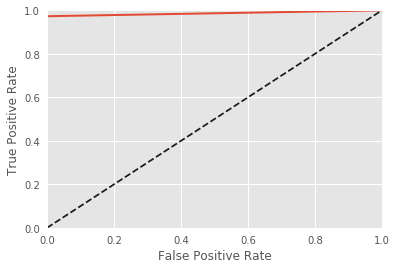

In [64]:
plot_roc_curve(fpr, tpr)
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_train, y_scores)
auc_roc

0.9865448233915353

The above results show that all our classiers did somewhat well. However, Random Forest algorithm was a winner :)! Remember we saw some issues during the exploratory data analysis. So, sticking with it for the remainder of this analysis because industry argument says ensemble algorithms like Random Forest:

handle well with outliers
are somewhat reburst against multicollinearity
rarely overfits
Having gotten above results by fitting all predictors, i will now check if selecting the most important predictors improves the result for Random Forest.

In [66]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1,  class_weight={0: 1, 1: 1,})

In [67]:
# Train the classifier
rf.fit(train_set_tr, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [68]:
#Print the name and gini importance of each feature
features_list = []
feature_imprt_list=[]
for feature, feature_imprt in zip(X_train.columns, rf.feature_importances_):
    features_list.append(feature)
    feature_imprt_list.append(feature_imprt)
    #print(feature)

In [69]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rf, threshold=0.025, prefit=True) #prefit=True does exactly same as sfm.fit(train_set_tr, y_train)

In [70]:
#Print the name and gini importance of each feature
imprt_features = []
for feature_list_index in sfm.get_support(indices=True):
    if feature_list_index < len(X_train.columns):
        imprt_features.append(X_train.columns[feature_list_index])
print(imprt_features)

['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel']


In [71]:
feature_df = pd.DataFrame({'feature_name': features_list,'feature_imprt': feature_imprt_list})
feature_df

,feature_imprt,feature_name
0,0.221686,perc_premium_paid_by_cash_credit
1,0.132239,age_in_days
2,0.124920,Income
3,0.077530,Count_3-6_months_late
4,0.075506,Count_6-12_months_late
5,0.042945,Count_more_than_12_months_late
6,0.121740,application_underwriting_score
7,0.083872,no_of_premiums_paid
8,0.064522,sourcing_channel
9,0.010089,residence_area_type


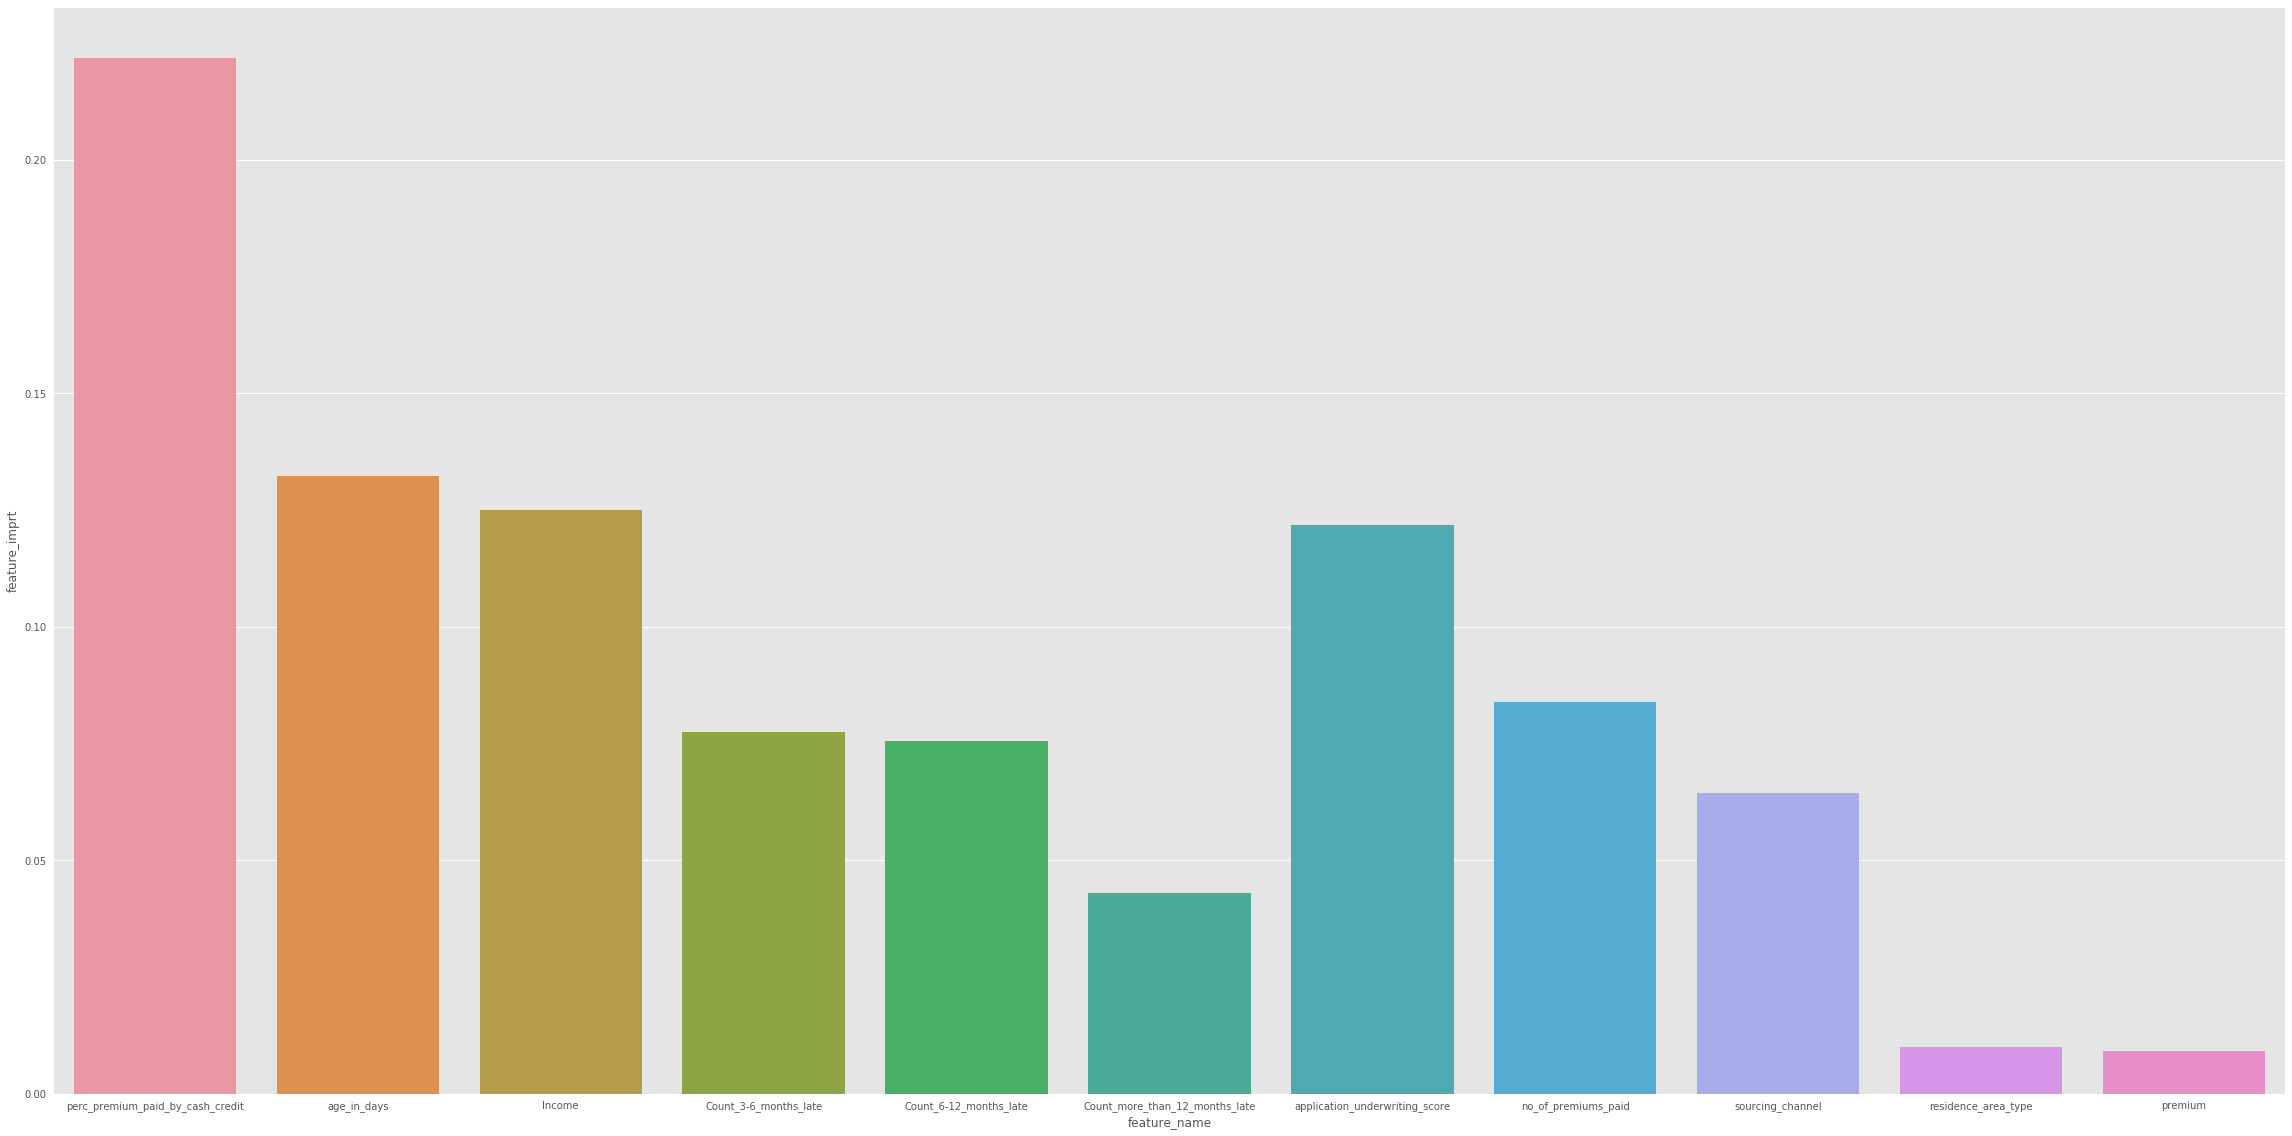

In [72]:
#plotting all features
fig = plt.figure(figsize=(40, 20))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= feature_df)
plt.show()

In [73]:
#plotting most important features
imprt_feature = feature_df[feature_df['feature_name'].isin(imprt_features)]
imprt_feat_desc= imprt_feature.sort_values(by='feature_imprt', ascending=False)

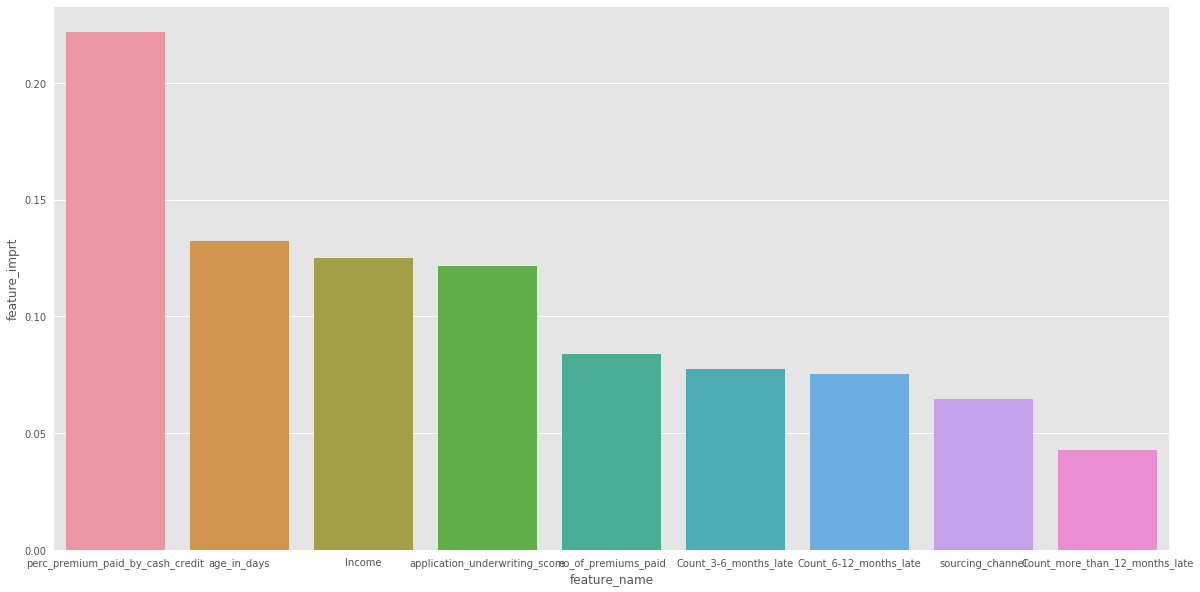

In [74]:
fig = plt.figure(figsize=(20, 10))
fig.add_subplot(1,1,1)
sns.barplot(x='feature_name', y='feature_imprt', data= imprt_feat_desc)
plt.show()

***Creating a model with the most important features***

In [75]:
train_bal_imprt = df_upsampled.copy()[imprt_features]
train_bal_imprt.head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel
3194,0.551,16067,198060,0.0,1.0,1.0,99.73,7,B
73151,0.899,18629,216110,1.0,0.0,0.0,98.91,14,A
17940,0.922,11686,90060,1.0,0.0,0.0,97.55,9,A
27938,0.944,14978,207030,5.0,2.0,0.0,99.24,12,D
75205,1.000,14607,98730,NaN,NaN,NaN,99.87,2,D


In [76]:
train_bal_imprt.shape

(134818, 9)

In [77]:
train_bal_imprt.dtypes

perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
dtype: object

In [78]:
#creating predictors and target variables for the train set
X_train2 = train_bal_imprt
y_train2 = df_upsampled['renewal']

#X_test2 = test_set_tr
#y_test2 = y_test.shape


In [79]:
cat_attribs2 = ['sourcing_channel',]
num_attribs2 = list(X_train2.drop(cat_attribs2, axis=1))

In [80]:
#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs2)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs2)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),])

In [81]:
#fitting the full pipeline to the training set
train_set_tr2 = full_pipeline.fit_transform(X_train2.astype(str))
train_set_tr2

array([[ 0.24699504, -0.37795283,  0.01156779, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17183388,  0.13030187,  0.05664579, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.23295828, -1.2470644 , -0.25815099, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.04193264,  0.05809082,  0.19133037, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10114831, -1.101452  , -0.17686074, ...,  1.        ,
         0.        ,  0.        ],
       [-1.21733311, -0.66739217, -0.22825716, ...,  0.        ,
         0.        ,  0.        ]])

In [82]:
train_set_tr2.shape, y_train2.shape, test_set_tr.shape, y_test.shape

((134818, 13), (134818,), (7986, 16), (7986,))

In [83]:
#building the model from the important features
imprt_rf = RandomForestClassifier()
imprt_rf.fit(train_set_tr2, y_train2)

#predicting the model from the important features
y_pred2 = rnd_clf.predict(test_set_tr)

#printing the accuracy scores
print(accuracy_score(y_test, y_pred2))

0.9267468069120962


In [84]:
y_scores2 = cross_val_predict(rnd_clf, train_set_tr2, y_train2, cv=3,)

In [85]:
fpr2, tpr2, thresholds = roc_curve(y_train2, y_scores2)

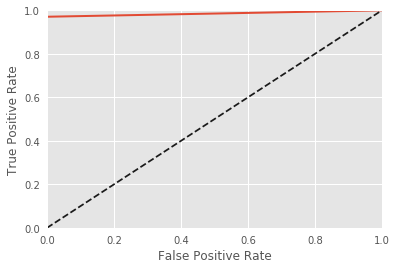

In [86]:
plot_roc_curve(fpr2, tpr2)
plt.show()

In [87]:
from sklearn.metrics import roc_auc_score
auc_roc2 = roc_auc_score(y_train, y_scores)
auc_roc2

0.9865448233915353

***Predicting the renewal values for the provided Test Set ***

In [88]:
X_test2.shape

(34224, 12)

In [89]:
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [90]:
X_test2.drop(['id'], axis = 1).head()

,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium
0,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300
1,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700
2,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700
3,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400
4,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600


In [91]:
cat_attribs3 = ['sourcing_channel', 'residence_area_type',]
num_attribs3 = list(X_train.drop(cat_attribs, axis=1))

In [92]:
#setting up the pipeline for numerical variables
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs3)), ('imputer', Imputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

#setting up the pipeline for categorical variables
cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs3)), 
                         ('cat_encoder', CategoricalEncoder(encoding="onehot-dense")),])

#combining both numerical and categorical pipelines
full_pipeline = FeatureUnion(transformer_list = [("num_pipeline", num_pipeline),("cat_pipeline", cat_pipeline),])

In [93]:
#fitting the full pipeline to the test set
test_set_tr2 = full_pipeline.fit_transform(X_test2.astype(str))
test_set_tr2

array([[-0.938344  ,  1.63153873, -0.56122227, ...,  0.        ,
         1.        ,  0.        ],
       [-0.5701399 ,  0.93602067,  0.30460676, ...,  0.        ,
         0.        ,  1.        ],
       [ 2.0521918 , -0.3153019 , -0.06212821, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.0315595 , -0.10677991, -0.02312723, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.0013018 , -0.38620701,  0.03452316, ...,  0.        ,
         0.        ,  1.        ],
       [-0.92636989,  1.07554361, -0.42046353, ...,  0.        ,
         0.        ,  1.        ]])

In [94]:
test_set_tr2.shape

(34224, 16)

In [95]:
y_pred3 = rnd_clf.predict(test_set_tr2)
y_pred3

array([1, 1, 1, ..., 1, 1, 1])

In [96]:
X_test2['renewal'] = list(y_pred3)
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,1
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,1
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,1
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,1
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,1


### The Second Part

To start of with the second part, we need to define Effort required for % improvement in renewal probability with associated incentives. Effort is usually defined according to PMBOK guidelines of Project Managment Institute (PMI) as the number of labor units required to complete a Task. Task could mean an entire Project or an Activity. Effort is sometimes expressed in Hours, Days, and Weeks etc. In our case, it will be in hours. It is usually defined with the formula:

(Effort) = (Duration) * (Number of Resources)

The Task at hand is increasing the odds of renewal of policy by the client. The Resources in question is all the measured variables or predictors we are using to predict the renewal. This is what the insurance agent has at his displosal. Duration is the total number of work periods required to complete a task

This formula will not work in many cases. But, it gives a fair idea of the relationship between Project Effort and Duration. This formula will work only if:
- Work can be easily distributed among many Resources.
- There is no dependency between the Resources.
- The productivity of all Resources is considered equal.

For example, the formula would not work while developing a piece of software code.

This definition is also closely related to calculation of the Expected Value of an event.

That said, the total number of Effort hours needed for this Task can be calculated from  the formula already provided, which is:

Y = 10*(1-np.exp(-X/400))

Hypothetically, i tried to simulate possible cases by imputing values with the code below. Effort in hours is on the Y-axis and Incentives is on the X-axis.

In [97]:
y_list = []
for X in range(3000):
    Y = 10*(1-np.exp(-X/400))
    y_list.append(Y)

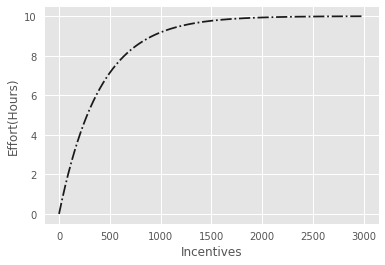

In [98]:
plt.xlabel('Incentives')
plt.ylabel('Effort(Hours)')
plt.plot(np.array(range(3000)), y_list, '-.k')
plt.show()

In [99]:
Effort_Incentive = pd.DataFrame({'Effort(hours)' : y_list,'Incentives' : list(range(3000))}, columns=['Effort(hours)','Incentives'])
Effort_Incentive.tail(5)

,Effort(hours),Incentives
2995,9.994400,2995
2996,9.994414,2996
2997,9.994428,2997
2998,9.994441,2998
2999,9.994455,2999


In [100]:
Effort_Incentive[Effort_Incentive['Incentives'] == 2800]

,Effort(hours),Incentives
2800,9.990881,2800


Looking at the plot above and the last few values of Effort(hours), we see that as incentive increases above 2800 (Dollars), Effort(hours) approaches a constant value of about 9.99 hours, tending towards 10 hours. This meets the condition given that: "After a point, more incentives does not convert to extra efforts." That means incentives paid after about 2800 (Dollars) mark is not necessarily for effort. It is most likely for something else. Let us dig a little deeper. 

If more incentives dont translate into significant efforts after about 2800 (Dollars) or 9.99 to 10 hours, then why should thew insurance company continue doing that? Let us look at the second formula provided us, which is:

Y2 = 20*(1-np.exp(-X2/5))

I tried to simulate possible cases by imputing values with the code below. 

In [101]:
y_list2 = []
for X2 in range(60):
    Y2 = 20*(1-np.exp(-X2/5))
    y_list2.append(Y2)

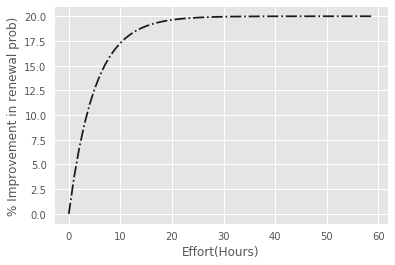

In [102]:
plt.xlabel('Effort(Hours)')
plt.ylabel('% Improvement in renewal prob)')
plt.plot(np.array(range(60)), y_list2, '-.k')
plt.show()

In [103]:
pct_impr = pd.DataFrame({'pct_imprv_renewal_prob' : y_list2,'Effort(Hours)' : list(range(60))}, columns=['pct_imprv_renewal_prob','Effort(Hours)'])
pct_impr.tail(5)

,pct_imprv_renewal_prob,Effort(Hours)
55,19.999666,55
56,19.999727,56
57,19.999776,57
58,19.999817,58
59,19.999850,59


In [104]:
pct_impr[pct_impr['Effort(Hours)'] == 39]

,pct_imprv_renewal_prob,Effort(Hours)
39,19.991805,39


Looking at the plot above and the last few values of pct_imprv_renewal_prob, we see that as Effort(Hours) approaches right around 39 to 40 hours, percentage improvement in renewal probability becomes insignificant. So, in essence an agent should be expected to work close to about 40 hours to keep policy renewal chances up, after which, any time worked is insignificant. This means the Insuance company should be paying the agents after the 10hours mark not because of efforts, but to improve the chances of policy renewal of clients. 

Now, going back to our definition for Effort, which is closely related to calculation of an expected value for any event; we assume that are predictors have an equal chance of being worked on my the agent. Exclusing the 'id' variable, which is an assigned value and not a randomixed measure and setting NaN values has arbitrary and True since values were imputed for them, the probability of agent working any of the predictor is:

(Effort) = (Duration) * (Number of Resources)

(Effort) = The number maximum number of expected hours that can provide a percentage improvement in renewal probability, above which is significant

(Number of Resources) = All the available predictors excluding the 'id' and 'renewal' columns.

(Duration) = (Effort) / (Number of Resources) = 40/11

In [105]:
expected_hours = []
for x in range(len(X_test2)):
    test = 0
    list1 = []
    for y in range(1,(len(X_test2.columns)-1)):
        if (X_test2.iloc[x, y] == 0):
            test=0
        else: test=(40/11)
        list1.append(test)
    expected_hours.append(sum(list1))
    

In [106]:
X_test2['expected_hours'] = expected_hours

In [107]:
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,expected_hours
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,1,29.090909
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,1,29.090909
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,1,29.090909
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,1,29.090909
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,1,32.727273


Calculating X from the formula already given depicting relationship between Effort and incentives

If Y = 10*(1-np.exp(-X/400)) 

(Y/10) + 1 = np.exp(-X/400)

Taking the log of both sides of the equation

np.log((Y/10) + 1) = np.log(np.exp(-X/400))

X = 400 -  np.log((Y/10) + 1) 


In [108]:
X_test2['Incentives']= 400-np.log((X_test2['expected_hours']/10) + 1)

In [109]:
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,expected_hours,Incentives
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,1,29.090909,398.636695
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,1,29.090909,398.636695
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,1,29.090909,398.636695
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,1,29.090909,398.636695
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,1,32.727273,398.547748


Also calculating Y2, which is the % improvement of renewal probability from the formula already given

Y2 = 20*(1-np.exp(-X2/5))

In [110]:
X_test2['pct_imprv_renewal_prob'] = 20*(1-np.exp(-X_test2['expected_hours']/5))

In [111]:
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,expected_hours,Incentives,pct_imprv_renewal_prob
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,1,29.090909,398.636695,19.940540
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,1,29.090909,398.636695,19.940540
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,1,29.090909,398.636695,19.940540
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,1,29.090909,398.636695,19.940540
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,1,32.727273,398.547748,19.971267


Calculating the net revenue from the formula already provided, which is:

Net Revenue = ((Prob. of Renewal +  % Improvement in Renewal Prob.) * Premium on Policy) - Incentives on Policy

In [112]:
X_test2['net_rev'] = ((X_test2['renewal'] + X_test2['pct_imprv_renewal_prob'])* X_test2['premium']) +  X_test2['Incentives']

In [113]:
X_test2.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,renewal,expected_hours,Incentives,pct_imprv_renewal_prob,net_rev
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural,3300,1,29.090909,398.636695,19.940540,69502.418319
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban,11700,1,29.090909,398.636695,19.940540,245402.953362
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban,11700,1,29.090909,398.636695,19.940540,245402.953362
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural,5400,1,29.090909,398.636695,19.940540,113477.552080
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural,9600,1,32.727273,398.547748,19.971267,201722.714611


Finally, the total revenue across all policies should be

In [116]:
X_test2_total_rev = X_test2['net_rev'].sum()
X_test2_total_rev

7770757212.237789

In [122]:
#from decimal import Decimal
#X_test2_total_rev = round(X_test2_total_rev,2)
#X_test2_total_rev

Now to know how accurate my prediction was, we call the formula also given, which is:

Combined Score = w1*AUC-ROC value + w2*(net revenue collected from all policies)*lambda

In [123]:
(0.7*auc_roc) + (0.3*X_test2_total_rev)

2331227164.3625813

In [126]:
mckinsey_submission = X_test2[['id', 'renewal', 'Incentives']]
mckinsey_submission. head(10)

,id,renewal,Incentives
0,649,1,398.636695
1,81136,1,398.636695
2,70762,1,398.636695
3,53935,1,398.636695
4,15476,1,398.547748
5,64797,1,398.636695
6,67412,1,398.547748
7,44241,1,398.547748
8,5069,1,398.636695
9,16615,1,398.636695


In [128]:
mckinsey_submission.to_csv('mckinsey_submission.csv')